# import libraries

In [2]:
import pandas as pd
from datetime import datetime
# from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
# use a ARIMA machine learning model 
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# function that called a parser that convert the type of date to datetime in python 

In [3]:
def parser(x):
	return datetime.strptime(x, '%m/%d/%Y')
# read the data file  csv file 

df = pd.read_csv('data_prices.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.index = df.index.to_period('M')

# show the Date and the Price

In [4]:
df

Date
2017-02     55.478001
2017-02     54.702000
2017-02     51.198002
2017-02     51.400002
2017-02     49.245998
              ...    
2022-02    860.000000
2022-02    875.760010
2022-02    922.429993
2022-02    923.390015
2022-02    876.349976
Freq: M, Name: Price, Length: 1259, dtype: float64

# show first 5 rows in dataset

In [5]:
print(df.head())

Date
2017-02    55.478001
2017-02    54.702000
2017-02    51.198002
2017-02    51.400002
2017-02    49.245998
Freq: M, Name: Price, dtype: float64


# check if there is a null  value in database

In [6]:
print(df.isnull().sum())

0



# describe the datafram , show the maen value and std .. etc.

In [7]:
print(df.describe())

count    1259.000000
mean      274.624800
std       318.157961
min        35.793999
25%        60.817999
50%        70.489998
75%       488.125000
max      1229.910034
Name: Price, dtype: float64


# plot the data 
### show there is a There is an ascending relationship between history and prices, 
### and there is a rise in prices from the beginning of 2020 until 2022


[Text(0.5, 1.0, 'Price by year 2017 to 2022'), Text(0, 0.5, 'Price')]

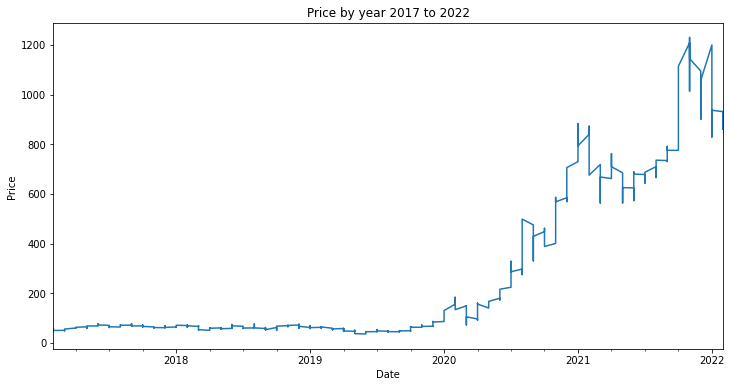

In [8]:
ax = df.plot(figsize=(12,6))
ax.set(title='Price by year 2017 to 2022', ylabel='Price')

# fit an ARIMA model and plot residual errors

In [10]:

import statsmodels.api as sm

"""
data segmentation Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q)\
 where parameters p, d, and q are non-negative integers,
  p is the order (number of time lags) of the autoregressive model,
  d is the degree of differencing (the number of times the data have had past values subtracted), and 
  q is the order of the moving-average ..

"""
# use a ARIMA  model with  parameters p, d, and q 

model = sm.tsa.arima.ARIMA(df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1259
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5303.812
Date:                Mon, 14 Mar 2022   AIC                          10619.623
Time:                        21:01:23   BIC                          10650.447
Sample:                    02-28-2017   HQIC                         10631.207
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0340      0.014     -2.401      0.016      -0.062      -0.006
ar.L2         -0.0403      0.013     -3.129      0.002      -0.065      -0.015
ar.L3          0.0386      0.018      2.194      0.0


# line plot of residuals

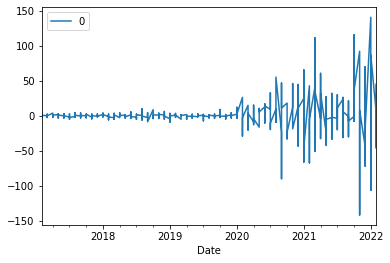

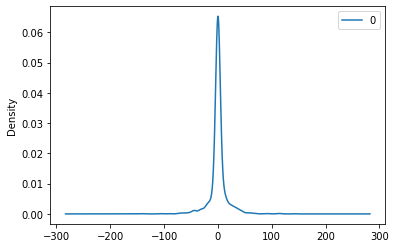

In [11]:

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals  (error diffenrt between the real and predicted)

In [12]:
print(residuals.describe())

                 0
count  1259.000000
mean      0.683629
std      16.457604
min    -141.761521
25%      -1.674110
50%       0.164488
75%       2.200648
max     141.047072


# split into train and test sets

In [13]:
X = df.values
print(X)

[ 55.478001  54.702     51.198002 ... 922.429993 923.390015 876.349976]


In [14]:
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list() # list 

# X real value Price

In [20]:
print(len(X))
print("size of total dataset that used : ",size)
print("size of train data : " , len(train))
print("size of test data : ",len(test))

1259
size of total dataset that used :  1007
size of train data :  1007
size of test data :  252


# validation


In [16]:
for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast() # generate array
	yhat = output[0]
	predictions.append(yhat) 
	obs = test[t] 
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=780.055958, expected=714.500000
predicted=716.016103, expected=698.840027
predicted=698.297450, expected=742.020020
predicted=737.412787, expected=682.219971
predicted=675.199670, expected=675.500000
predicted=682.548238, expected=718.429993
predicted=714.674043, expected=686.440002
predicted=678.435366, expected=653.200012
predicted=664.662822, expected=621.440002
predicted=624.304009, expected=597.950012
predicted=591.617569, expected=563.000000
predicted=558.237962, expected=673.580017
predicted=669.063346, expected=668.059998
predicted=659.905733, expected=699.599976
predicted=708.417188, expected=693.729980
predicted=701.892477, expected=707.940002
predicted=699.526931, expected=676.880005
predicted=680.286157, expected=701.809998
predicted=697.891500, expected=653.159973
predicted=655.957369, expected=654.869995
predicted=652.608439, expected=670.000000
predicted=671.068037, expected=662.159973
predicted=656.814016, expected=630.270020
predicted=639.460818, expected=640

# evaluate forecasts by use mean_squared_error

Test RMSE: 31.687


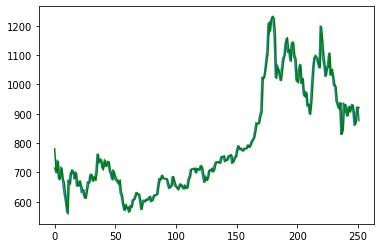

In [17]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='green')
pyplot.show()

# make sure we predict the most recent 20% prices.

In [22]:
X = df
X[1008:1259]

Date
2021-02    698.840027
2021-02    742.020020
2021-02    682.219971
2021-02    675.500000
2021-03    718.429993
              ...    
2022-02    860.000000
2022-02    875.760010
2022-02    922.429993
2022-02    923.390015
2022-02    876.349976
Freq: M, Name: Price, Length: 251, dtype: float64